## CS 529: Security Analytics - Homework 2 (FALL'19)
### Problem 3

#### Name: Andrea Zapata Delgado
#### Purdue id: 0031827996


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("Pima.csv", header=None, names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'HasDiabetes'])
data.shape

(768, 9)

In [2]:
data.iloc[:, :-1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015E97459278>]],
      dtype=object)

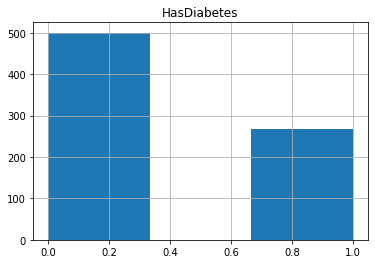

In [3]:
data.hist(column='HasDiabetes', bins = 3)

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['HasDiabetes'], test_size=0.2, random_state=23)

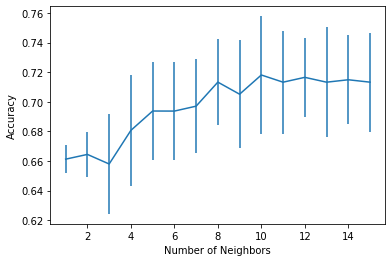

In [10]:
scores = np.ones((16,2))
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    kscore = cross_val_score(knn, X_train, y_train, cv=5)
    scores[k] = [kscore.mean(), kscore.std()]

fig, ax = plt.subplots()
fig.subplots_adjust()
ax.errorbar(x = np.arange(1,16), y = scores[1:,0], yerr = scores[1:,1] )
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
plt.show()

### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [20]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.7597402597402597

### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

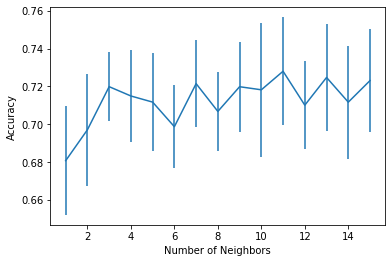

In [7]:
std_scale = StandardScaler().fit(X_train)
X_train_standard, X_test_standard = std_scale.transform(X_train), std_scale.transform(X_test)
scores2 = np.ones((16,2))
for k in range(1,16):
    knn = KNeighborsClassifier(n_neighbors=k)
    kscore = cross_val_score(knn, X_train_standard, y_train, cv=5)
    scores2[k] = [kscore.mean(), kscore.std()]
fig, ax = plt.subplots()
fig.subplots_adjust()
ax.errorbar(x = np.arange(1,16), y = scores2[1:,0], yerr = scores2[1:,1])
ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
plt.show()

In [18]:
knn_std = KNeighborsClassifier(n_neighbors=11)
knn_std.fit(X_train_standard, y_train)
knn_std.score(X_test_standard, y_test)

0.7922077922077922